In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

#PACF and ACF plots for Correlation Function
#QQPlot
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import  plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose, STL

#Smoothing Techniques
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt 

#Dicky-Fuller Test
from statsmodels.tsa.stattools import  adfuller

#ARIMA and SARIMAX 
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

print('Libraries Imported')

Libraries Imported


# Data preparation 

In [4]:
df = pd.read_csv('Petrol.csv', parse_dates = True)
df.head()

,Year,Quarter,Consumption
0,2001,Q1,14.978
1,2001,Q2,11.099
2,2001,Q3,10.057
3,2001,Q4,10.454
4,2002,Q1,9.295


In [5]:
df.tail()

,Year,Quarter,Consumption
46,2012,Q3,0.88818
47,2012,Q4,0.99804
48,2013,Q1,0.84120
49,2013,Q2,0.74032
50,2013,Q3,0.72823


The data has been collected from a time period of 2001 and 2013, and the timeseries values are around 50 which are divided based on Quarters.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         51 non-null     int64  
 1   Quarter      51 non-null     object 
 2   Consumption  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [8]:
quarters = pd.date_range(start='1/01/2001', end='9/30/2013', freq='Q')
quarters

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         51 non-null     int64  
 1   Quarter      51 non-null     object 
 2   Consumption  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [10]:
df = df.drop('Quarter', axis = 1)
df.head()

,Year,Consumption
0,2001,14.978
1,2001,11.099
2,2001,10.057
3,2001,10.454
4,2002,9.295


In [11]:
df['Year'] = pd.DataFrame(quarters)
df.head()

,Year,Consumption
0,2001-03-31,14.978
1,2001-06-30,11.099
2,2001-09-30,10.057
3,2001-12-31,10.454
4,2002-03-31,9.295


In [12]:
df = df.set_index('Year')

In [13]:
df.head()

,Consumption
Year,
2001-03-31,14.978
2001-06-30,11.099
2001-09-30,10.057
2001-12-31,10.454
2002-03-31,9.295


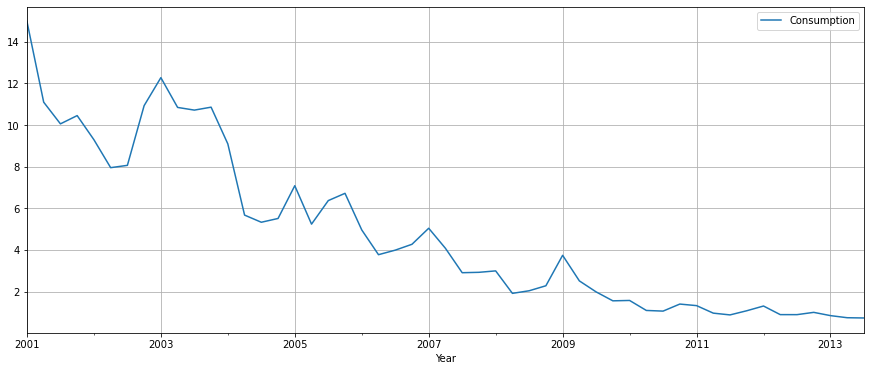

In [15]:
from pylab import rcParams 

rcParams['figure.figsize'] = 15,6
df.plot()
plt.grid()
plt.show();

We can see from the above plot, that the Petrol consumption has gradually decreased from the period 2001 to 2013.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

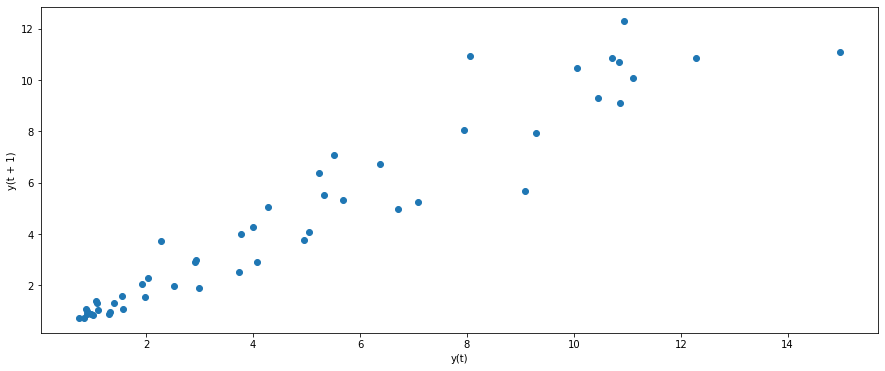

In [16]:
pd.plotting.lag_plot(df, lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

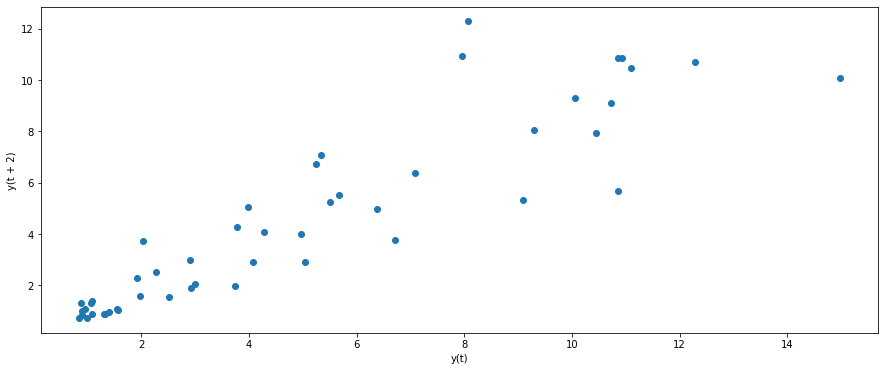

In [17]:
pd.plotting.lag_plot(df, lag = 2)

<AxesSubplot:xlabel='Year', ylabel='Consumption'>

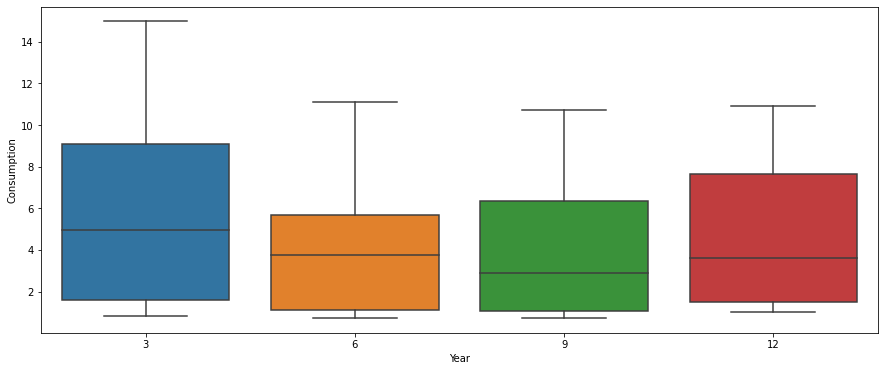

In [25]:
sns.boxplot(x = df.index.month, y = df['Consumption'])

We can see that the the Q3 has more variation compared to other 3 quarters.

In [28]:
## Defects in the data.

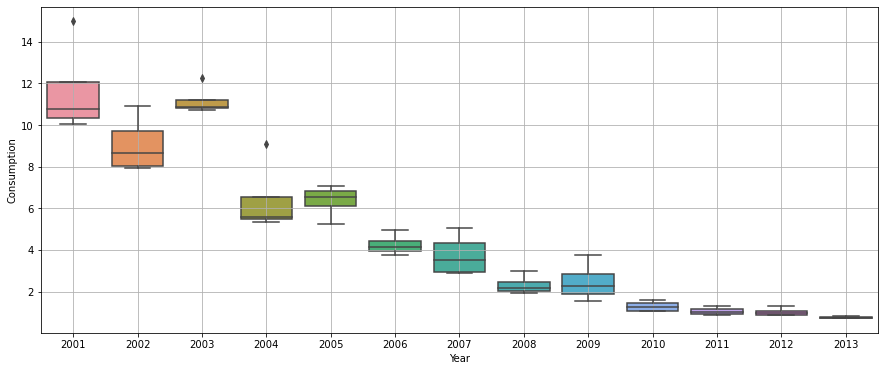

In [27]:
sns.boxplot(x = df.index.year, y = df['Consumption'])
plt.grid()
plt.show();

We can see that the Year - 2001 has more Petrol Consumptions comparatively to other Years in the Timeseries.

There are not much outliers in the Timeseries data.

In [30]:
#Missing values in the data

df.isnull().sum()

Consumption    0
dtype: int64

We can see that there are no missing values in the data. 

# Data Understanding

# a. Decomposing Time series

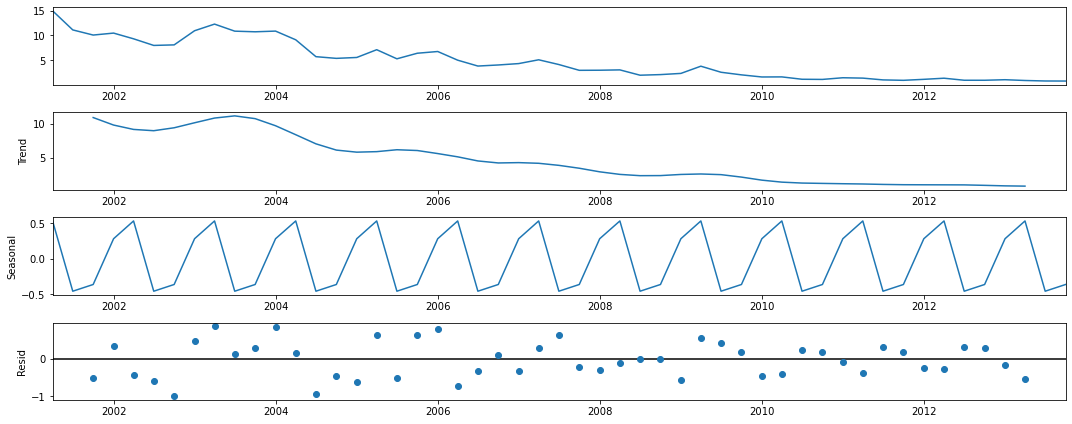

In [32]:
decompositional_decompose = seasonal_decompose(df, model='additive')
decompositional_decompose.plot()
plt.show();

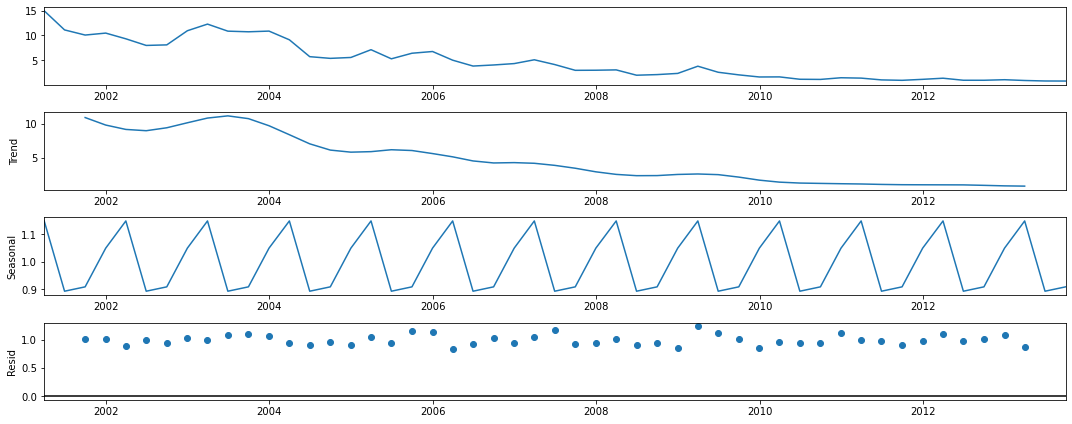

In [33]:
decompositional_decompose = seasonal_decompose(df, model='multiplicative')
decompositional_decompose.plot()
plt.show();

-> Both the Trends in both the models are Downtrend.  
-> The above plot shows Strong seasonality component.

Since Seasonality does not change with the trend in both M and A, and also the residuals in the Multiplicative decomposed model are upheld towards the variation of 1.0, hence we consider the model to be Multiplicative model.

# b. Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary? 

### Plotting Rolling Mean and Rolling Standard Deviation

In [38]:
rolmean = df.rolling(window = 5).mean()
rolstd = df.rolling(window = 5).std()

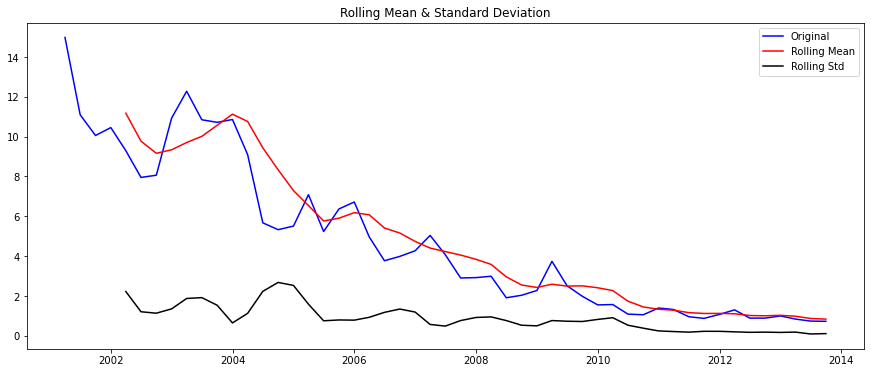

In [39]:
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Both Rolling Mean and Standard Deviation change over a period of time.

### Statistical test to confirm the stationarity

In [42]:
observations= df.values
test_result = adfuller(observations)

In [43]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -5.164825
p-value: 0.000010
Critical Values:
	1%: -3.61040
	5%: -2.93911
	10%: -2.60806


In [44]:
def adf_test(series):
    result = adfuller(series.dropna(),autolag='AIC')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

In [45]:
adf_test(df["Consumption"])

Data is stationary


**As we can infer from the above data, that the Data is stationary, we don't need to perform differencing and Logarithmic Transformations.**

# c. Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots? 

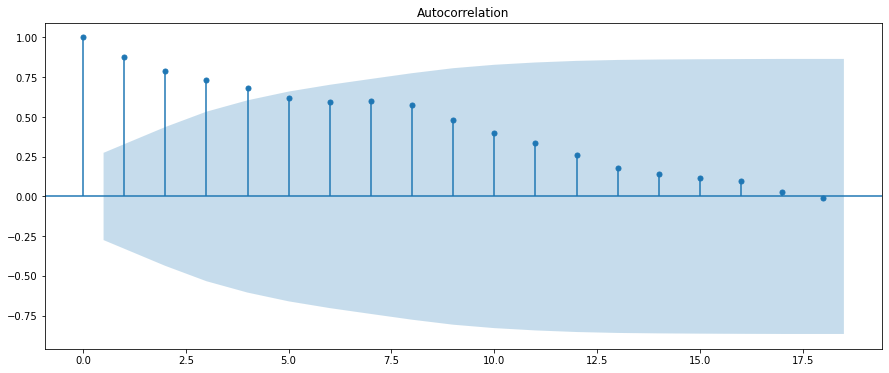

In [48]:
##AutoCorrelation Plot

plot_acf(df);

**Inference:**    


     ACF plot is used to deduce the q value, we can see that there is a slow decay, we can observe that there   are 5 insignificant features. 
     q = 0

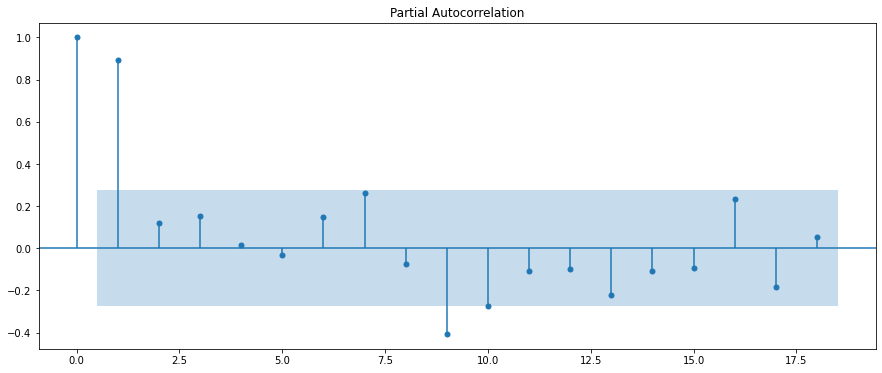

In [50]:
#PACF (Partial Autocorrelation Plot)

plot_pacf(df);

**Inference:** 


    PACF plot, we can see that there is a decay after the 2 significant features. 
    It refers to p.
    p = 1

# Model Building 

# a. Split dataset into train and test sets. Use last two months of data for testing. 

In [51]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.06, shuffle = False)

In [52]:
train.shape

(47, 1)

In [53]:
test.shape

(4, 1)

# b. Applying Smoothing Techniques for the Time Series based on Trend and Seasonality

In [54]:
from math import sqrt
from sklearn.metrics import mean_squared_error

## Simple Average

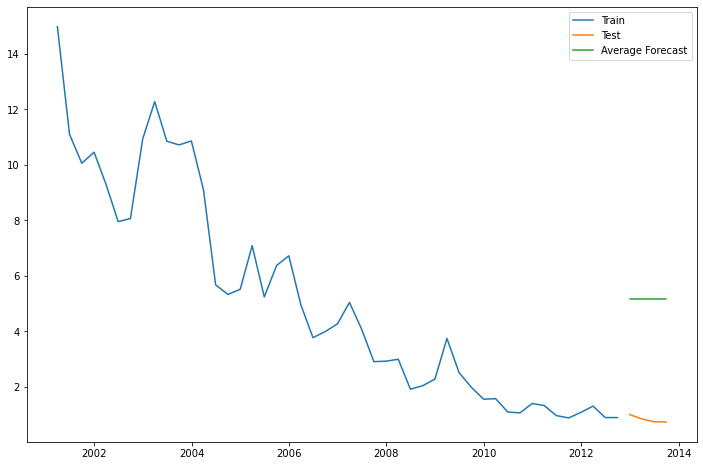

In [56]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Consumption'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [58]:
rms = sqrt(mean_squared_error(test.Consumption, y_hat_avg.avg_forecast))
print(rms)

4.3213113260834435


### Function for MAPE trend.

In [59]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [60]:
MAPE(test.Consumption, y_hat_avg.avg_forecast)

532.387798721014

## Moving Average

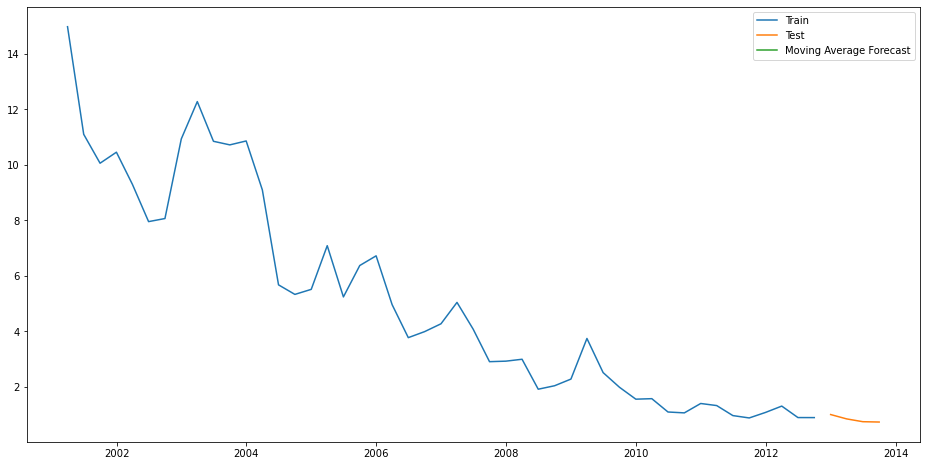

In [80]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Consumption'].rolling(12).mean()
plt.figure(figsize=(16,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [81]:
rms_ma = sqrt(mean_squared_error(test.Consumption, y_hat_avg['moving_avg_forecast']))
print(rms_ma)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [82]:
MAPE(test.Consumption, y_hat_avg['moving_avg_forecast'])

nan

## Simple Exponential Smoothing

In [75]:
model = SimpleExpSmoothing(train, initialization_method = 'estimated')
model_SES_fit = model.fit(smoothing_level=0.9,optimized=True)
SES_predict = model_SES_fit.forecast(steps=len(test))

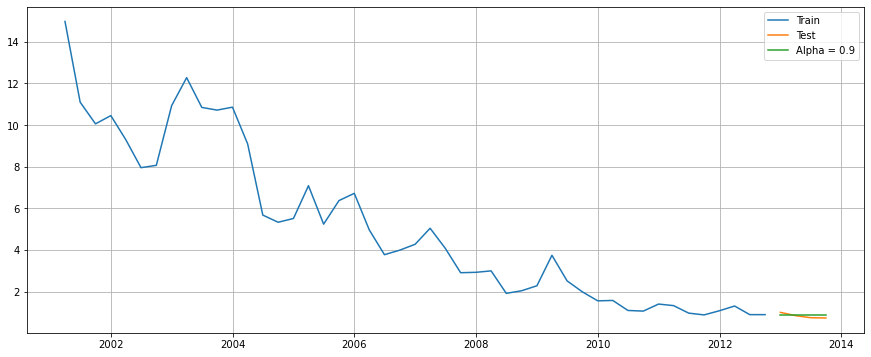

In [76]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.9')

plt.legend()
plt.grid()

In [78]:
rms = sqrt(mean_squared_error(test.Consumption, SES_predict))
print(rms)

0.1262450085490294


In [79]:
MAPE(test['Consumption'],SES_predict)

14.924031298993906

In [103]:
residuals = test.Consumption - SES_predict

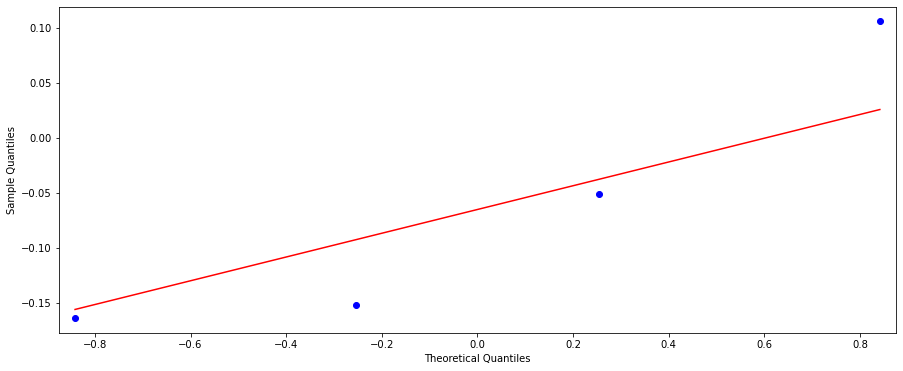

In [104]:
from statsmodels.graphics.gofplots import  qqplot

qqplot(residuals,line="s");

## Holt's Linear trend method

**Extended Simple Exponential Smoothing to allow forecasting based on the trend.**    
**Also referred as Double Exponential Smoothing Method.**

In [93]:
model_holt = Holt(train, exponential=True)
model_holt_fit = model_holt.fit(smoothing_level=0.9,  smoothing_slope = 0.1, optimized=True)
Holt_predict = model_holt_fit.forecast(steps=len(test))

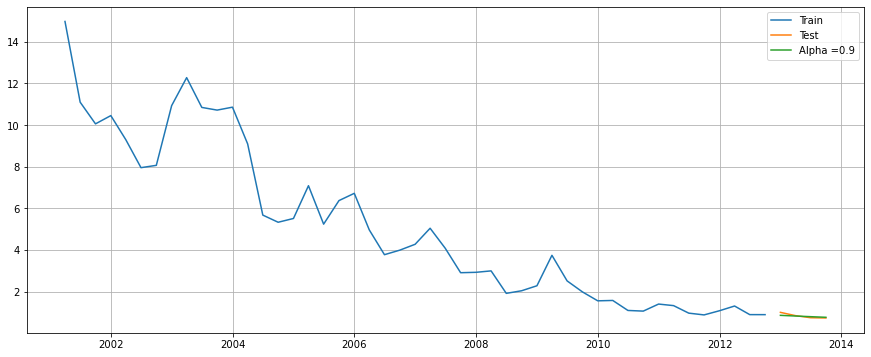

In [94]:
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')

plt.plot(Holt_predict, label='Alpha =0.9')

plt.legend()
plt.grid()

In [95]:
rms = sqrt(mean_squared_error(test.Consumption, Holt_predict))
print(rms)

0.07829557316335675


In [96]:
MAPE(test['Consumption'],Holt_predict)

6.974287635661428

In [109]:
residuals_HoltLinear = test.Consumption - Holt_predict

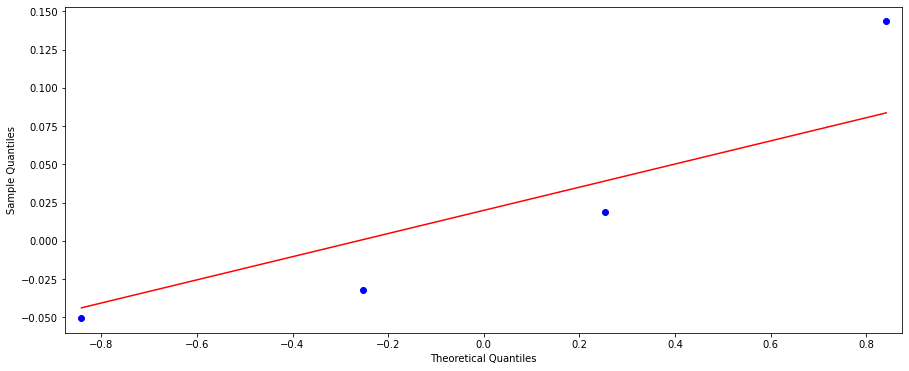

In [110]:
qqplot(residuals_HoltLinear,line="s");

## Holt's Winter

In [97]:

fit1 = ExponentialSmoothing(train['Consumption'], trend='multiplicative', seasonal='multiplicative', initialization_method = 'estimated').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

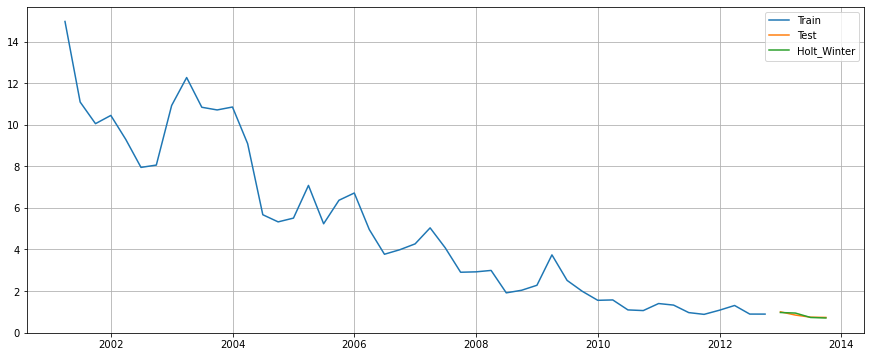

In [98]:
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')

plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')

plt.legend()
plt.grid()

In [99]:
rms3 = sqrt(mean_squared_error(test.Consumption, y_hat_avg['Holt_Winter']))
print(rms3)

0.05345473117227553


In [100]:
MAPE(test['Consumption'],y_hat_avg.Holt_Winter)

5.127345240872866

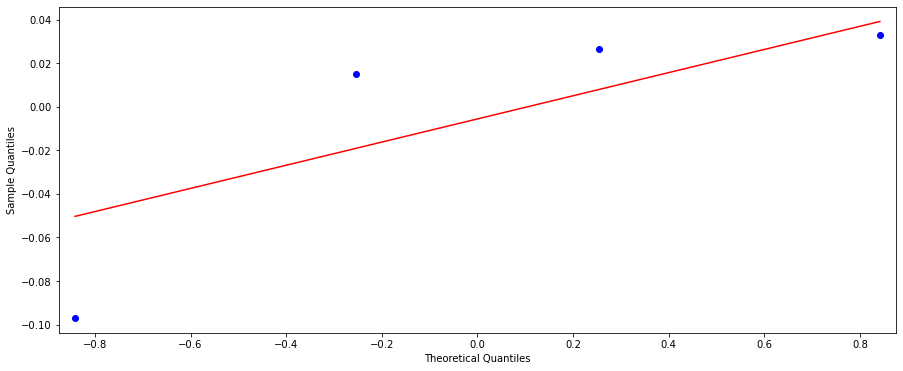

In [112]:
residuals_HoltWinter = test.Consumption - y_hat_avg.Holt_Winter
qqplot(residuals_HoltWinter, line = 's');

# ARMA Model

In [118]:
from statsmodels.tsa.arima_model       import  ARMA, ARIMA

In [120]:
model_arma = ARMA(train,(2,2))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            Consumption   No. Observations:                   47
Model:                     ARMA(2, 2)   Log Likelihood                 -76.650
Method:                       css-mle   S.D. of innovations              1.158
Date:                Fri, 24 Sep 2021   AIC                            165.301
Time:                        21:34:03   BIC                            176.401
Sample:                    03-31-2001   HQIC                           169.478
                         - 09-30-2012                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.8965     20.699      0.478      0.633     -30.672      50.466
ar.L1.Consumption     1.9972      0.001   2343.223      0.000       1.996       1.999
ar.L2.Consumption    -0.

## Predicting forecasts using the model

In [121]:
pred_start = test.index[0]
pred_end   = test.index[-1]

In [122]:
pred_end

Timestamp('2013-09-30 00:00:00')

In [123]:
predictions = model_fit.predict(start = pred_start, end = pred_end)
predictions1 = model_fit.forecast(12)

In [124]:
predictions1

(array([0.92101435, 0.8868029 , 0.85293175, 0.81940089, 0.78621031,
        0.75336   , 0.72084992, 0.68868003, 0.65685029, 0.62536065,
        0.59421103, 0.56340136]),
 array([1.15767352, 1.94520816, 2.49276979, 2.93774559, 3.32161433,
        3.66362714, 3.97459701, 4.2613193 , 4.52839652, 4.77911817,
        5.01593265, 5.24072114]),
 array([[-1.34798405,  3.19001275],
        [-2.92573502,  4.69934083],
        [-4.03280726,  5.73867076],
        [-4.93847466,  6.57727644],
        [-5.72403415,  7.29645478],
        [-6.42721725,  7.93393725],
        [-7.06921709,  8.51091692],
        [-7.66335232,  9.04071238],
        [-8.21864378,  9.53234437],
        [-8.74153883,  9.99226013],
        [-9.23683632, 10.42525838],
        [-9.70822333, 10.83502605]]))

## Lets plot actual series and forecast

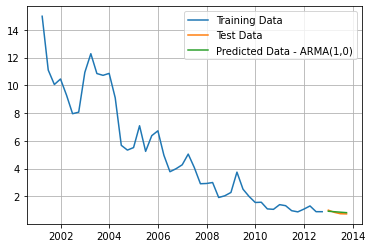

In [125]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predictions,label='Predicted Data - ARMA(1,0)')
plt.legend(loc='best')
plt.grid();

## Finding residuals

In [126]:
residuals = test.Consumption - predictions

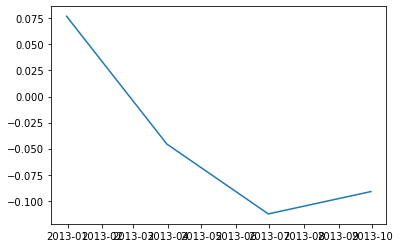

In [127]:
plt.plot(residuals)
plt.show()

### Accuracy Matrix

In [128]:
mean_squared_error(test.values,predictions.values,squared=False)

0.08515590456825164

### QQPlot (Residual Plot to check model performance)

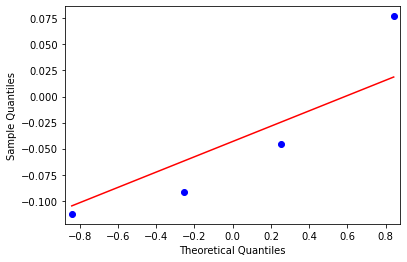

In [129]:
qqplot(residuals,line="s");

# ARIMA Model

In [130]:
import itertools
p = q = range(0, 2)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2],7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 1, 0, 7)
Model: (0, 1, 0)(0, 1, 1, 7)
Model: (0, 1, 0)(1, 0, 0, 7)


In [131]:
model_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

### Creating an empty Dataframe with column names only where the model and AIC scores will be saved

In [132]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


## Model parameter selection using hypertuning

In [133]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:262.98328981396685
ARIMA(0, 0, 1) - AIC:221.01224185316423
ARIMA(0, 1, 0) - AIC:149.13853368889477
ARIMA(0, 1, 1) - AIC:149.30224050235734
ARIMA(1, 0, 0) - AIC:160.280091552098
ARIMA(1, 0, 1) - AIC:159.35102932425903
ARIMA(1, 1, 0) - AIC:150.35002833235953
ARIMA(1, 1, 1) - AIC:150.862274051256


In [134]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
2,"(0, 1, 0)",149.138534
3,"(0, 1, 1)",149.302241
6,"(1, 1, 0)",150.350028
7,"(1, 1, 1)",150.862274
5,"(1, 0, 1)",159.351029
4,"(1, 0, 0)",160.280092
1,"(0, 0, 1)",221.012242
0,"(0, 0, 0)",262.983290


In [138]:
model = ARIMA(train, order=(1,1,1))

model_Arima = model.fit()

print(model_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Consumption   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -71.431
Method:                       css-mle   S.D. of innovations              1.142
Date:                Fri, 24 Sep 2021   AIC                            150.862
Time:                        21:43:02   BIC                            158.177
Sample:                    06-30-2001   HQIC                           153.602
                         - 09-30-2012                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3174      0.201     -1.578      0.114      -0.712       0.077
ar.L1.D.Consumption    -0.2133      0.332     -0.642      0.521      -0.865       0.438
ma.L1.D.Consumpt

### Predicting Results

In [139]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [141]:
pred_end

Timestamp('2013-09-30 00:00:00')

In [142]:
ARIMA_predictions = model_Arima.predict(start=pred_start, end=pred_end)

### Invert transformation

In [143]:
ARIMA_pred = ARIMA_predictions.cumsum()
ARIMA_pred = pd.DataFrame(ARIMA_pred,columns=train.columns)

In [171]:
ARIMA_pred

,Consumption
2012-12-31,-0.214446
2013-03-31,-0.553816
2013-06-30,-0.866540
2013-09-30,-1.184948


In [144]:
df_fc = ARIMA_pred.copy()
columns = train.columns
for col in columns:        
        df_fc[str(col)+'_forecast'] = train[col].iloc[-1] + df_fc[str(col)]

In [145]:
df_fc.head()

,Consumption,Consumption_forecast
2012-12-31,-0.214446,0.673734
2013-03-31,-0.553816,0.334364
2013-06-30,-0.866540,0.021640
2013-09-30,-1.184948,-0.296768


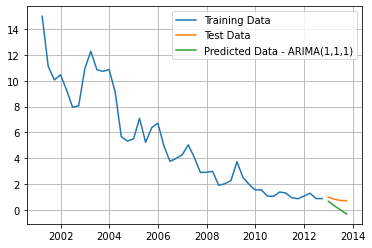

In [147]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,df_fc['Consumption_forecast'],label='Predicted Data - ARIMA(1,1,1)')
plt.legend(loc='best')
plt.grid();

## Finding model residuals

In [148]:
residuals_arima = test.Consumption - df_fc['Consumption_forecast']

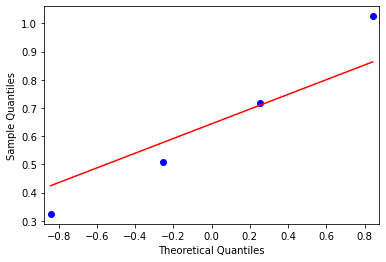

In [149]:
qqplot(residuals_arima, line = 's');

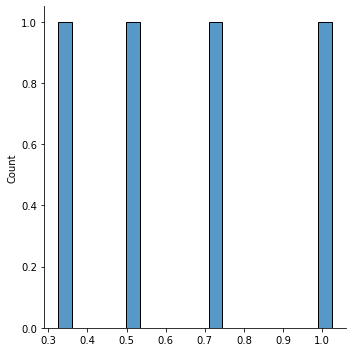

In [150]:
sns.displot(residuals_arima,bins=20)

In [151]:
rmse = sqrt(mean_squared_error(test.Consumption,df_fc['Consumption_forecast']))
print(rmse)

0.69447456659811


In [153]:
mape_arima = MAPE(test['Consumption'].values,df_fc['Consumption_forecast'].values)
print(mape_arima)

82.64369627711639


## Creating new dataframe for storing the results

In [168]:
resultsDf = pd.DataFrame({'Test RMSE': rmse,'Test MAPE':mape_arima}
                           ,index=['ARIMA(1,1,1)'])

resultsDf

,Test RMSE,Test MAPE
"ARIMA(1,1,1)",0.694475,82.643696


# Now to include seasonality, we will use 'SARIMA' model

In [155]:
import itertools
p = q = range(0, 2)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 1, 0, 7)
Model: (0, 1, 0)(0, 1, 1, 7)
Model: (0, 1, 0)(1, 0, 0, 7)


## Creating an empty Dataframe with column names only where the model and AIC scores will be saved

In [156]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


## Model parameter using Hypertuning

In [157]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:298.61843637648553
SARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:219.76974793822424
SARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:181.57396371817555
SARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:149.01637402800827
SARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:158.605662108381
SARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:144.593429493529
SARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:155.31250191843964
SARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:146.33140689928598
SARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:242.4795778968355
SARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:178.49906016031667
SARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:155.33027016293966
SARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:120.30959929915592
SARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:142.7898072288677
SARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:122.29248507875637
SARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:139.14520050616667
SARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:119.24371433531162
SARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:136.59552193155355
SARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:111.6905079663664
SARIMA(0, 1, 0)x(

In [158]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
59,"(1, 1, 1)","(0, 1, 1, 7)",86.672811
27,"(0, 1, 1)","(0, 1, 1, 7)",88.893329
43,"(1, 0, 1)","(0, 1, 1, 7)",90.297477
31,"(0, 1, 1)","(1, 1, 1, 7)",92.044205
47,"(1, 0, 1)","(1, 1, 1, 7)",92.407983
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 7)",178.499060
2,"(0, 0, 0)","(0, 1, 0, 7)",181.573964
1,"(0, 0, 0)","(0, 0, 1, 7)",219.769748
8,"(0, 0, 1)","(0, 0, 0, 7)",242.479578


## SARIMA model parameters are selected as (1,0,1)(1,1,1,7) 

In [160]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(1,0,1),
                                seasonal_order=(1,1,1,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                       Consumption   No. Observations:                   47
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 7)   Log Likelihood                 -41.204
Date:                           Fri, 24 Sep 2021   AIC                             92.408
Time:                                   21:51:23   BIC                             99.578
Sample:                               03-31-2001   HQIC                            94.745
                                    - 09-30-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9370      0.012     78.011      0.000       0.913       0.961
ma.L1         -1.0000   3327.763     -0.000

In [161]:
SARIMA_predictions = model_Sarima.predict(start=pred_start, end=pred_end)

## Plotting model predictions

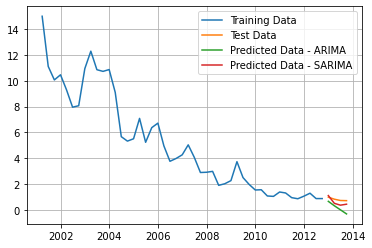

In [162]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,df_fc['Consumption_forecast'],label='Predicted Data - ARIMA')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [163]:
rmse_sarima = sqrt(mean_squared_error(test.Consumption,SARIMA_predictions))
print(rmse_sarima)

0.2841898359446894


In [165]:
mape_sarima = MAPE(test.Consumption,SARIMA_predictions)
print(mape_sarima)

34.19806964545755


In [169]:
resultsDfsarima = pd.DataFrame({'Test RMSE': rmse_sarima, 'Test MAPE':mape_sarima}
                           ,index=['SARIMA(1, 0, 1)(1, 1, 1)7'])

resultsDf = pd.concat([resultsDf, resultsDfsarima])
resultsDf

,Test RMSE,Test MAPE
"ARIMA(1,1,1)",0.694475,82.643696
"SARIMA(1, 0, 1)(1, 1, 1)7",0.284190,34.198070


## Model Residual Analysis

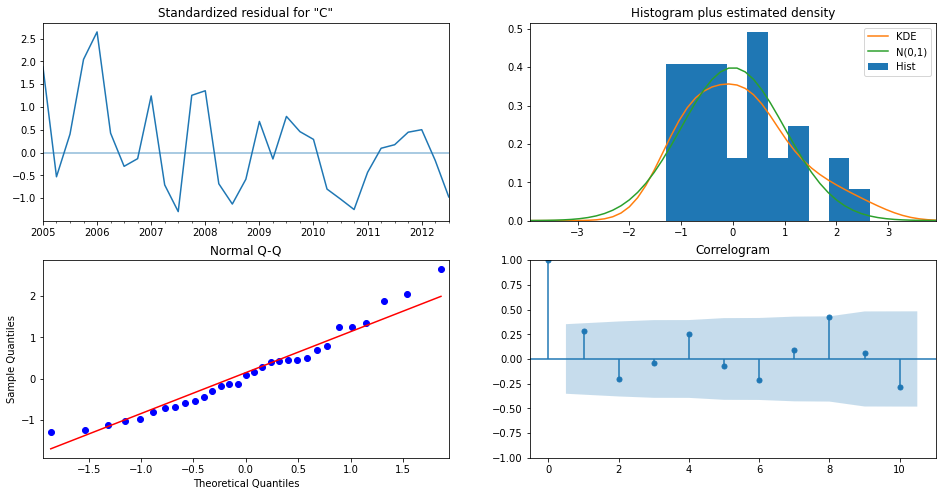

In [170]:
model_Sarima.plot_diagnostics(figsize=(16, 8))
plt.show()

## It can be observed that Model residuals are normally distributed and ACF plot also confirms that residuals are random